# 分析 COVID-19 论文

在本次挑战中，我们将继续探讨 COVID 大流行这一主题，重点处理与该主题相关的科学论文。这里有一个 [CORD-19 数据集](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge)，其中包含了超过 7000 篇（撰写本文时的数据）关于 COVID 的论文，并附有元数据和摘要（其中约一半的论文还提供了全文）。

使用 [Text Analytics for Health](https://docs.microsoft.com/azure/cognitive-services/text-analytics/how-tos/text-analytics-for-health/?WT.mc_id=academic-77958-bethanycheum) 认知服务分析该数据集的完整示例已在[这篇博客文章](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/)中进行了描述。我们将讨论这一分析的简化版本。


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 获取数据

首先，我们需要获取将要处理的 CORD 论文的元数据。

**注意**：本仓库不提供数据集的副本。您可能需要先从 [Kaggle 上的这个数据集](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge?select=metadata.csv) 下载 [`metadata.csv`](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge?select=metadata.csv) 文件。可能需要注册 Kaggle。您也可以从[这里](https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/historical_releases.html)下载数据集，无需注册，但这将包括所有的全文数据以及元数据文件。

我们将尝试直接从在线来源获取数据，但如果失败，您需要按照上述说明下载数据。此外，如果您计划进一步实验，下载数据是有意义的，这样可以节省等待时间。

> **注意** 数据集相当大，大约 1 GB，以下代码行可能需要较长时间才能完成！（大约 5 分钟）


In [146]:
df = pd.read_csv("https://datascience4beginners.blob.core.windows.net/cord/metadata.csv.zip",compression='zip')
# df = pd.read_csv("metadata.csv")
df.head()

C:\winapp\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning:

Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.



cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc   
3  PMC59574  11686871   no-cc   
4  PMC59580  11686888   no-cc   

                                            abstract publish_time  \
0  OBJECTIVE: This retrospective chart review des...   2001-07-04   
1  Inflammatory diseases of the respiratory tract...   2000-08-15   
2  Surfactant protein-D (SP-D) participates in th...   2000-08-25   
3  Endothelin-1 (ET-1) is a 21 amino acid peptide...   2001-02-22   
4  Respiratory syncytial virus (RSV) and pneumoni...   2001-05-11   

                                             authors         journal  mag_id  \
0                Madani, Tariq A; Al-Ghamdi, Aisha A  BMC Infect Dis     NaN   
1  Vliet, Albert van der; Eiserich, Jason P; Cros...      Respir Res     NaN   
2                                    Crouch, Erika C      Respir Res     NaN   
3  Fagan, Karen A; McMurtry, Ivan F; Rodman, David M      Respir Res     NaN   
4  Domachowske, Joseph B; Bonville, Cynthia A; Ro...      Respir Res     NaN   

  who_covidence_id arxiv_id  \
0              NaN      NaN   
1              NaN      NaN   
2              NaN      NaN   
3              NaN      NaN   
4              NaN      NaN   

                                      pdf_json_files  \
0  document_parses/pdf_json/d1aafb70c066a2068b027...   
1  document_parses/pdf_json/6b0567729c2143a66d737...   
2  document_parses/pdf_json/06ced00a5fc04215949aa...   
3  document_parses/pdf_json/348055649b6b8cf2b9a37...   
4  document_parses/pdf_json/5f48792a5fa08bed9f560...   

                               pmc_json_files  \
0  document_parses/pmc_json/PMC35282.xml.json   
1  document_parses/pmc_json/PMC59543.xml.json   
2  document_parses/pmc_json/PMC59549.xml.json   
3  document_parses/pmc_json/PMC59574.xml.json   
4  document_parses/pmc_json/PMC59580.xml.json   

                                                 url  s2_id  
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...    NaN  
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
4  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN

我们现在将把出版日期列转换为`datetime`，并绘制直方图以查看出版日期的范围。


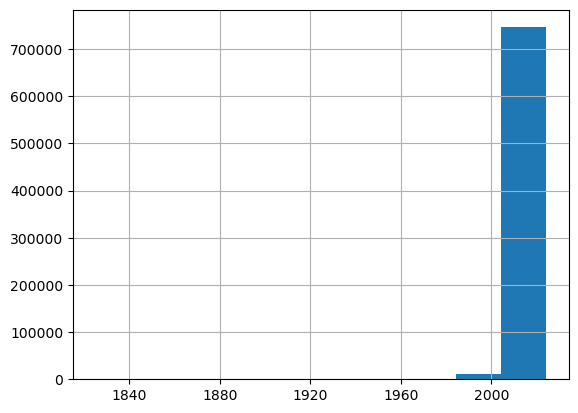

In [147]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_time'].hist()
plt.show()

## 结构化数据提取

让我们看看可以从摘要中轻松提取哪些信息。我们可能感兴趣的一件事是了解有哪些治疗策略，以及它们是如何随着时间演变的。首先，我们可以手动整理出用于治疗 COVID 的可能药物清单，以及诊断清单。然后，我们逐一检查这些清单，并在论文摘要中搜索对应的术语。


In [148]:
medications = [
    'hydroxychloroquine', 'chloroquine', 'tocilizumab', 'remdesivir', 'azithromycin', 
    'lopinavir', 'ritonavir', 'dexamethasone', 'heparin', 'favipiravir', 'methylprednisolone']
diagnosis = [
    'covid','sars','pneumonia','infection','diabetes','coronavirus','death'
]

for m in medications:
    print(f" + Processing medication: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))
    
for m in diagnosis:
    print(f" + Processing diagnosis: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))

 + Processing medication: hydroxychloroquine
 + Processing medication: chloroquine
 + Processing medication: tocilizumab
 + Processing medication: remdesivir
 + Processing medication: azithromycin
 + Processing medication: lopinavir
 + Processing medication: ritonavir
 + Processing medication: dexamethasone
 + Processing medication: heparin
 + Processing medication: favipiravir
 + Processing medication: methylprednisolone
 + Processing diagnosis: covid
 + Processing diagnosis: sars
 + Processing diagnosis: pneumonia
 + Processing diagnosis: infection
 + Processing diagnosis: diabetes
 + Processing diagnosis: coronavirus
 + Processing diagnosis: death


我们在数据框中添加了多个列，这些列记录了某种药物或诊断在摘要中出现的次数。

> **注意** 在查找子字符串时，我们会在单词前添加一个空格。如果不这样做，可能会得到错误的结果，因为*chloroquine*也会在子字符串*hydroxychloroquine*中被找到。此外，我们强制将摘要列转换为`str`类型，以避免错误——试着去掉`str`看看会发生什么。

为了更方便地处理数据，我们可以提取仅包含药物计数的子数据框，并计算累计出现次数。这可以帮助我们找到最受欢迎的药物：


In [149]:
dfm = df[medications]
dfm = dfm.sum().reset_index().rename(columns={ 'index' : 'Name', 0 : 'Count'})
dfm.sort_values('Count',ascending=False)

Name  Count
0   hydroxychloroquine   9806
3           remdesivir   7861
2          tocilizumab   6118
1          chloroquine   4578
8              heparin   4161
5            lopinavir   3811
4         azithromycin   3585
7        dexamethasone   3340
9          favipiravir   2439
10  methylprednisolone   1600
6            ritonavir    948

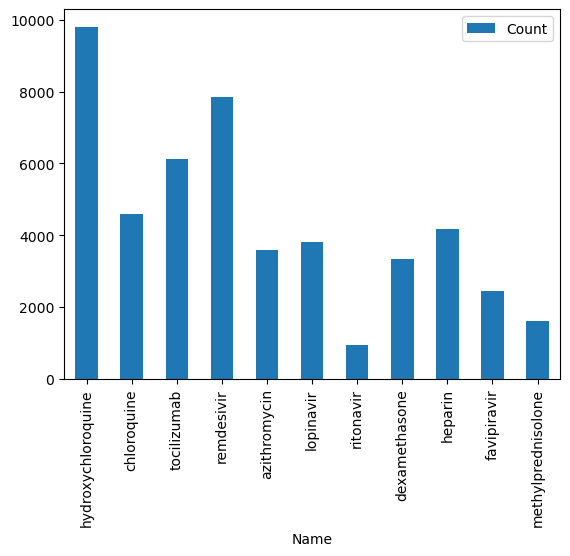

In [150]:
dfm.set_index('Name').plot(kind='bar')
plt.show()

## 寻找治疗策略中的趋势

在上面的例子中，我们对所有值进行了 `sum` 操作，但我们也可以按月进行相同的操作：


In [151]:
dfm = df[['publish_time']+medications].set_index('publish_time')
dfm = dfm[(dfm.index>="2020-01-01") & (dfm.index<="2021-07-31")]
dfmt = dfm.groupby([dfm.index.year,dfm.index.month]).sum()
dfmt

hydroxychloroquine  chloroquine  tocilizumab  \
publish_time publish_time                                                 
2020         1                           3672         1773         1779   
             2                              0           19            0   
             3                             45           72            5   
             4                            188          238           50   
             5                            459          191          158   
             6                            381          149          243   
             7                            381          178          202   
             8                            307          115          172   
             9                            319          123          185   
             10                           319           96          212   
             11                           272           66          170   
             12                           255          102          229   
2021         1                           2191          780         1787   
             2                            163           66          184   
             3                            172           85          190   
             4                            198           70          125   
             5                            141           55          138   
             6                            144           29          138   
             7                            112           49           96   

                           remdesivir  azithromycin  lopinavir  ritonavir  \
publish_time publish_time                                                   
2020         1                   2134          1173       1430        370   
             2                      3             3         18         11   
             3                     27            12         52         16   
             4                    124            68        113         13   
             5                    209           132        135         41   
             6                    186           110        132         18   
             7                    165           108        138         29   
             8                    165           145         91         24   
             9                    190            91         98         28   
             10                   227            72        127         39   
             11                   197            79        104         27   
             12                   271            98         76         31   
2021         1                   2523           892        841        198   
             2                    173            85         76          9   
             3                    295            87        100         17   
             4                    161            83         60         13   
             5                    179            69         55         21   
             6                    182            75         41         12   
             7                    270            64         59          5   

                           dexamethasone  heparin  favipiravir  \
publish_time publish_time                                        
2020         1                       561      984          666   
             2                         1        3           12   
             3                         3       21           11   
             4                        14       77           48   
             5                        12       92           48   
             6                        48       84           30   
             7                        58      117           56   
             8                        56       95           45   
             9                        90      111           46   
             10                       97      117           81   
             11                       77 

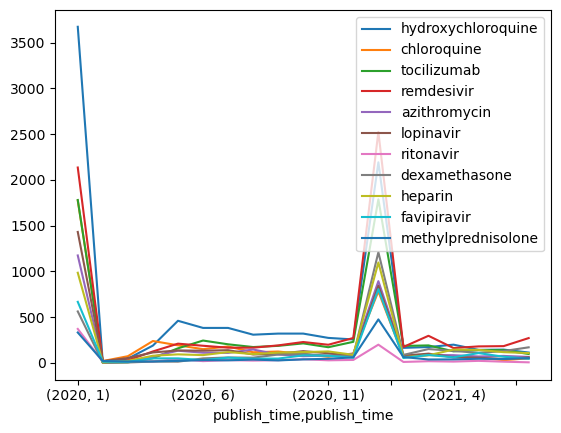

In [152]:
dfmt.plot()
plt.show()

一个有趣的现象是，我们在两个时间点观察到巨大的峰值：2020年1月和2021年1月。这是由于一些论文没有明确标注出版日期，而被默认标注为当年1月所导致的。

为了更好地理解数据，让我们只可视化几种药物的数据。我们还将“清除”1月份的数据，并用某个中间值填充，以便生成更美观的图表：


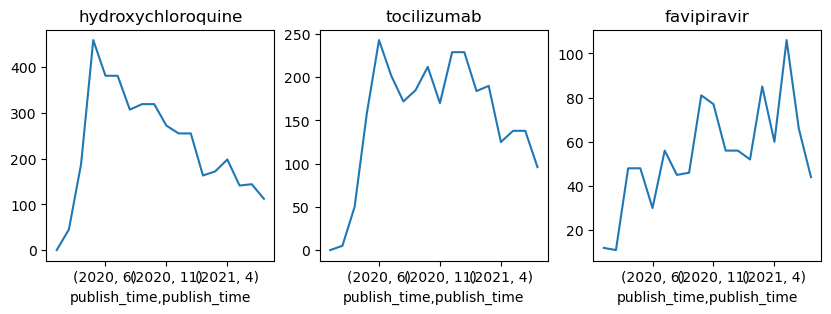

In [153]:
meds = ['hydroxychloroquine','tocilizumab','favipiravir']
dfmt.loc[(2020,1)] = np.nan
dfmt.loc[(2021,1)] = np.nan
dfmt.fillna(method='pad',inplace=True)
fig, ax = plt.subplots(1,len(meds),figsize=(10,3))
for i,m in enumerate(meds):
    dfmt[m].plot(ax=ax[i])
    ax[i].set_title(m)
plt.show()

观察到羟氯喹的受欢迎程度在最初几个月有所上升，然后开始下降，而法匹拉韦的提及次数则显示出稳定的增长。另一种可视化相对受欢迎程度的好方法是使用**堆叠图**（或在 Pandas 术语中称为**面积图**）：


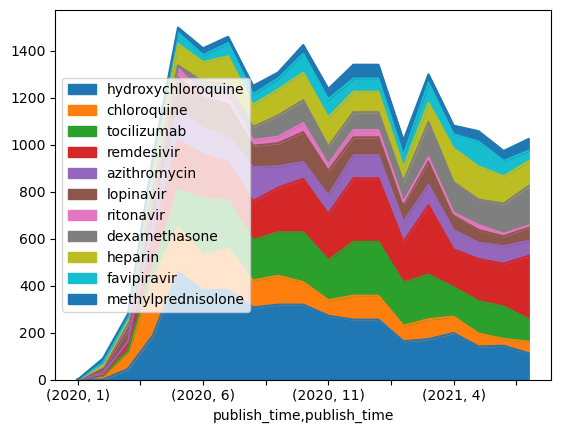

In [154]:
dfmt.plot.area()
plt.show()

甚至更进一步，我们可以以百分比计算相对受欢迎程度：


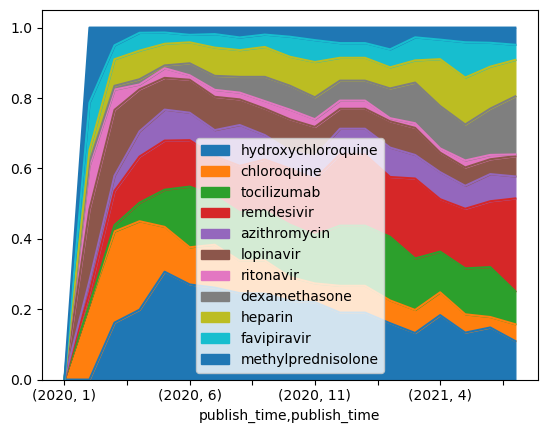

In [155]:
dfmtp = dfmt.iloc[:,:].apply(lambda x: x/x.sum(), axis=1)
dfmtp.plot.area()
plt.show()

## 计算药物与诊断的对应关系

我们可以研究的一个最有趣的关系是不同的诊断如何通过不同的药物进行治疗。为了将其可视化，我们需要计算**共现频率图**，它将显示两个术语在同一篇论文中被提及的次数。

这样的图本质上是一个二维矩阵，最适合用**numpy数组**来表示。我们将通过遍历所有摘要并标记其中出现的实体来计算这个图：


In [156]:
m = np.zeros((len(medications),len(diagnosis)))
for a in df['abstract']:
    x = str(a).lower()
    for i,d in enumerate(diagnosis):
        if ' '+d in x:
            for j,me in enumerate(medications):
                if ' '+me in x:
                    m[j,i] += 1

In [157]:
m

array([[4788., 2264.,  741., 2109.,  348., 2730.,  975.],
       [2111., 1238.,  231.,  998.,   79., 1394.,  364.],
       [2186.,  821.,  691., 1063.,  185., 1136.,  573.],
       [3210., 2191.,  522., 1538.,  160., 2191.,  622.],
       [1803.,  773.,  406.,  880.,  133.,  909.,  410.],
       [1982., 1102.,  379.,  885.,  113., 1366.,  370.],
       [ 504.,  356.,   83.,  259.,   23.,  354.,  106.],
       [1419.,  640.,  345.,  742.,  108.,  760.,  314.],
       [1537.,  678.,  330.,  782.,   93.,  826.,  301.],
       [ 967.,  634.,  201.,  431.,   44.,  656.,  136.],
       [ 660.,  336.,  293.,  385.,   53.,  452.,  148.]])

可视化此矩阵的方法之一是绘制一个**热图**：


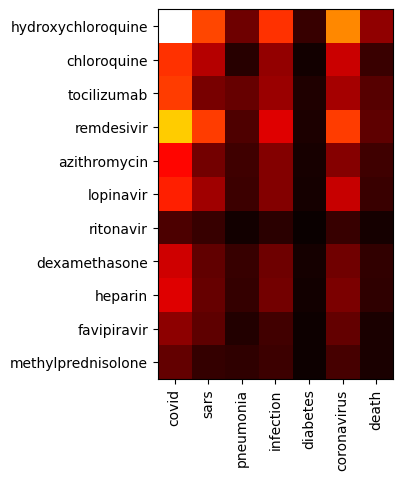

In [158]:
plt.imshow(m,interpolation='nearest',cmap='hot')
ax = plt.gca()
ax.set_yticks(range(len(medications))) 
ax.set_yticklabels(medications)
ax.set_xticks(range(len(diagnosis)))
ax.set_xticklabels(diagnosis,rotation=90)
plt.show()

然而，使用所谓的 **Sankey** 图可以实现更好的可视化效果！`matplotlib` 并不内置支持这种图表类型，因此我们需要使用 [Plotly](https://plotly.com/python/)，具体可以参考[这个教程](https://plotly.com/python/sankey-diagram/)。

要制作 Plotly 的 Sankey 图，我们需要构建以下列表：
* 图中所有节点的列表 `all_nodes`，包括药物和诊断
* 源节点和目标节点的索引列表——这些列表将显示哪些节点位于图的左侧，哪些位于右侧
* 所有链接的列表，每个链接包括：
   - 在 `all_nodes` 数组中的源节点索引
   - 目标节点索引
   - 表示链接强度的值。这正是我们共现矩阵中的值。
   - （可选）链接的颜色。我们可以选择突出显示某些术语以提高清晰度

绘制 Sankey 图的通用代码被组织为一个独立的 `sankey` 函数，该函数接收两个列表（源类别和目标类别）以及共现矩阵。它还允许我们指定一个阈值，忽略所有低于该阈值的链接——这可以使图表稍微简化一些。


In [160]:
import plotly.graph_objects as go

def sankey(cat1, cat2, m, treshold=0, h1=[], h2=[]):
    all_nodes = cat1 + cat2
    source_indices = list(range(len(cat1)))
    target_indices = list(range(len(cat1),len(cat1)+len(cat2)))

    s, t, v, c = [], [], [], []
    for i in range(len(cat1)):
        for j in range(len(cat2)):
            if m[i,j]>treshold:
                s.append(i)
                t.append(len(cat1)+j)
                v.append(m[i,j])
                c.append('pink' if i in h1 or j in h2 else 'lightgray')

    fig = go.Figure(data=[go.Sankey(
        # Define nodes
        node = dict(
        pad = 40,
        thickness = 40,
        line = dict(color = "black", width = 1.0),
        label =  all_nodes),

        # Add links
        link = dict(
        source =  s,
        target =  t,
        value =  v,
        color = c
    ))])
    fig.show()

sankey(medications,diagnosis,m,500,h2=[0])

## 结论

您已经看到，我们可以使用相当简单的方法从非结构化数据源（如文本）中提取信息。在这个例子中，我们使用了现有的药物列表，但如果使用自然语言处理（NLP）技术从文本中进行实体提取，将会更加强大。在[这篇博客文章](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/)中，我们描述了如何使用云服务进行实体提取。另一种选择是使用 Python 的 NLP 库，例如 [NLTK](https://www.nltk.org/)——关于如何使用 NLTK 从文本中提取信息的方法可以参考[这里](https://www.nltk.org/book/ch07.html)。


## 挑战

继续围绕以下方向研究 COVID 论文数据：

1. 构建不同药物的共现矩阵，查看哪些药物经常一起出现（即在同一篇摘要中被提到）。你可以修改用于构建药物和诊断共现矩阵的代码。
2. 使用热图可视化该矩阵。
3. 作为一个进阶目标，你可以尝试使用 [弦图](https://en.wikipedia.org/wiki/Chord_diagram) 可视化药物的共现关系。[这个库](https://pypi.org/project/chord/) 可能会帮助你绘制弦图。
4. 另一个进阶目标是尝试使用正则表达式提取不同药物的剂量（例如，在 *每天服用 400mg 的氯喹* 中提取 **400mg**），并构建一个数据框，显示不同药物的不同剂量。**注意**：考虑药物名称附近文本中出现的数值。



---

**免责声明**：  
本文档使用AI翻译服务[Co-op Translator](https://github.com/Azure/co-op-translator)进行翻译。尽管我们努力确保准确性，但请注意，自动翻译可能包含错误或不准确之处。应以原始语言的文档作为权威来源。对于关键信息，建议使用专业人工翻译。对于因使用本翻译而引起的任何误解或误读，我们概不负责。
